<a href="https://colab.research.google.com/github/prasann25/colab/blob/main/03_convolutional_neural_network_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow


Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.


##  Get the data

The images we're working with are the from the Food101 dataset (101 different classes of food) :[https://www.kaggle.com/kmader/food41](https://www.kaggle.com/kmader/food41)

However we've modified it to only use 2 classes (pizza & steak) using the image data modification notebook : [https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

Note : We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesnt work)


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-06-27 18:37:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.13.240, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   205MB/s    in 0.5s    

2021-06-27 18:37:55 (205 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the begining of any machine learning project is become one with the data.

And for a computer vision.. this usually means visualizing many samples of your data.

In [2]:
! ls pizza_steak/

test  train


In [3]:
! ls pizza_steak/train

pizza  steak


In [4]:
! ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os
# Walk through pizza_steak directoty and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak") :
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# the extra file in out pizza_steak directory is ".DS_Store"
! ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jun 27 17:28 .
drwxr-xr-x 1 root root 4096 Jun 27 18:37 ..
-rw-r--r-- 1 root root 6148 Jun 27 18:37 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 27 17:28 test
drwxr-xr-x 4 root root 4096 Jun 27 17:28 train


In [7]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [8]:
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_train

750

To visualize our images, first let's get the class names programmatically.


In [9]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created  a list of class_names from the subdirectories
class_names = class_names[1:] #remove .DS_store
print(class_names)

['pizza' 'steak']


In [10]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class) :
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['56449.jpg']
Image shape: (512, 384, 3)


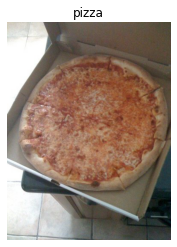

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
# The images we've imported and plotted are actually arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[210, 197, 180],
        [213, 200, 183],
        [213, 202, 184],
        ...,
        [ 76,  74,  53],
        [ 74,  72,  51],
        [ 70,  68,  47]],

       [[214, 203, 185],
        [214, 203, 185],
        [212, 201, 183],
        ...,
        [ 76,  74,  53],
        [ 75,  73,  52],
        [ 71,  69,  48]],

       [[219, 208, 190],
        [216, 205, 187],
        [210, 201, 184],
        ...,
        [ 78,  73,  53],
        [ 75,  73,  52],
        [ 72,  70,  49]],

       ...,

       [[185, 201, 191],
        [190, 203, 194],
        [192, 205, 196],
        ...,
        [ 66,  61,  67],
        [ 65,  60,  66],
        [ 64,  57,  64]],

       [[187, 204, 196],
        [188, 205, 197],
        [189, 206, 198],
        ...,
        [ 71,  64,  71],
        [ 69,  62,  69],
        [ 64,  55,  60]],

       [[191, 212, 205],
        [186, 205, 199],
        [181, 200, 194],
        ...,
        [ 68,  61,  6

In [13]:
#  View the image shape
img.shape # returns width , height , color channels

(512, 384, 3)

**Note** : As we've discussed before, many machine learning model, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale**(also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [14]:
# Get all the pixels values between 0 and 1
img/255.

array([[[0.82352941, 0.77254902, 0.70588235],
        [0.83529412, 0.78431373, 0.71764706],
        [0.83529412, 0.79215686, 0.72156863],
        ...,
        [0.29803922, 0.29019608, 0.20784314],
        [0.29019608, 0.28235294, 0.2       ],
        [0.2745098 , 0.26666667, 0.18431373]],

       [[0.83921569, 0.79607843, 0.7254902 ],
        [0.83921569, 0.79607843, 0.7254902 ],
        [0.83137255, 0.78823529, 0.71764706],
        ...,
        [0.29803922, 0.29019608, 0.20784314],
        [0.29411765, 0.28627451, 0.20392157],
        [0.27843137, 0.27058824, 0.18823529]],

       [[0.85882353, 0.81568627, 0.74509804],
        [0.84705882, 0.80392157, 0.73333333],
        [0.82352941, 0.78823529, 0.72156863],
        ...,
        [0.30588235, 0.28627451, 0.20784314],
        [0.29411765, 0.28627451, 0.20392157],
        [0.28235294, 0.2745098 , 0.19215686]],

       ...,

       [[0.7254902 , 0.78823529, 0.74901961],
        [0.74509804, 0.79607843, 0.76078431],
        [0.75294118, 0

## An end to end example of a CNN model

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to :
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess the data(get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary", 
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed = 42)

# Build a CNN model(same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters =10, 
                               kernel_size=3, 
                               activation="relu",
                               input_shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2, 
                                  padding="valid"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

                                            

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 203ms/step - loss: 0.5454 - accuracy: 0.7167 - val_loss: 0.4035 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4212 - accuracy: 0.8113 - val_loss: 0.3391 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4072 - accuracy: 0.8220 - val_loss: 0.3362 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3737 - accuracy: 0.8433 - val_loss: 0.3123 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3358 - accuracy: 0.8540 - val_loss: 0.3099 - val_accuracy: 0.8800


**Note** : If the above cell is taking longer than ~10 seconds per epoch , make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU( you may ave to rerun some cells above)

In [16]:
# There is batch size of 32 images per batch, so len(train_data) = 47
1500/32

46.875

In [17]:
# Without the GPU runtime

# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - 103s 2s/step - loss: 0.5768 - accuracy: 0.6913 - val_loss: 0.3942 - val_accuracy: 0.8080
# Epoch 2/5
# 47/47 [==============================] - 101s 2s/step - loss: 0.4195 - accuracy: 0.8140 - val_loss: 0.3745 - val_accuracy: 0.8380
# Epoch 3/5
#  6/47 [==>...........................] - ETA: 1:19 - loss: 0.4097 - accuracy: 0.8385

In [ ]:
# # With GPU runtime
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - 13s 203ms/step - loss: 0.5454 - accuracy: 0.7167 - val_loss: 0.4035 - val_accuracy: 0.8360
# Epoch 2/5
# 47/47 [==============================] - 9s 186ms/step - loss: 0.4212 - accuracy: 0.8113 - val_loss: 0.3391 - val_accuracy: 0.8620
# Epoch 3/5
# 47/47 [==============================] - 9s 189ms/step - loss: 0.4072 - accuracy: 0.8220 - val_loss: 0.3362 - val_accuracy: 0.8740
# Epoch 4/5
# 47/47 [==============================] - 9s 187ms/step - loss: 0.3737 - accuracy: 0.8433 - val_loss: 0.3123 - val_accuracy: 0.8660
# Epoch 5/5
# 47/47 [==============================] - 9s 186ms/step - loss: 0.3358 - accuracy: 0.8540 - val_loss: 0.3099 - val_accuracy: 0.8800

In [18]:
# Get a model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0